In [20]:
import retro
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

%matplotlib inline
env = None

In [13]:
if env is None:
    env = retro.make(game='SonicTheHedgehog2-Genesis', state='EmeraldHillZone.Act1', record='.')
_ = env.reset()
for i in range( 10 ):
    env.step( np.zeros( env.action_space.shape ) )
frame, reward, done, info = env.step( env.action_space.sample() )

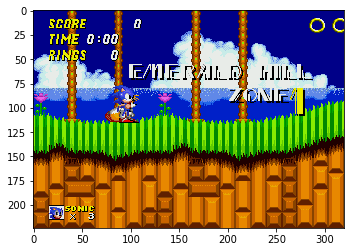

In [16]:
plt.imshow( frame )

So we know it's Standing/1.bmp, let's try just finding that in the image and highlighting it

In [80]:
??plt.imread

Signature: plt.imread(*args, **kwargs)
Docstring:
Read an image from a file into an array.

*fname* may be a string path, a valid URL, or a Python
file-like object.  If using a file object, it must be opened in binary
mode.

If *format* is provided, will try to read file of that type,
otherwise the format is deduced from the filename.  If nothing can
be deduced, PNG is tried.

Return value is a :class:`numpy.array`.  For grayscale images, the
return array is MxN.  For RGB images, the return value is MxNx3.
For RGBA images the return value is MxNx4.

matplotlib can only read PNGs natively, but if `PIL
<http://www.pythonware.com/products/pil/>`_ is installed, it will
use it to load the image and return an array (if possible) which
can be used with :func:`~matplotlib.pyplot.imshow`. Note, URL strings
may not be compatible with PIL. Check the PIL documentation for more
information.
Source:   
@docstring.copy_dedent(_imread)
def imread(*args, **kwargs):
    return _imread(*args, **kwargs)
F

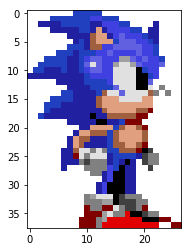

In [82]:
sonic_standing_1 = plt.imread( 'data/Sonic/Wait/1.png' )

sonic_standing_1 *= 255
sonic_standing_1 = sonic_standing_1.astype( int )

sonic_standing_1_clean = sonic_standing_1.copy()
pink = np.array( [ 255, 0, 255 ] )

where_pink = np.logical_and( 
    sonic_standing_1_clean[ :, :, 0 ] == 255,
    sonic_standing_1_clean[ :, :, 2 ] == 255,
    sonic_standing_1_clean[ :, :, 3 ] == 255,
)

sonic_standing_1_clean[ where_pink ] = [ 0, 0, 0, 0 ]

# https://codereview.stackexchange.com/a/132933

padding_mask = np.logical_not(
    np.logical_and( 
        sonic_standing_1_clean[ :, :, 0 ] == 0,
        sonic_standing_1_clean[ :, :, 1 ] == 0,
        sonic_standing_1_clean[ :, :, 2 ] == 0
    )
)

coords = np.argwhere( padding_mask )

x0, y0 = coords.min( axis=0 )
x1, y1 = coords.max( axis=0 ) + 1

sonic_standing_1_clean = sonic_standing_1_clean[ x0:x1, y0:y1 ]

plt.imshow( sonic_standing_1_clean )

In [83]:
# https://docs.opencv.org/3.4.1/d4/dc6/tutorial_py_template_matching.html

# img = frame.copy()
img = np.full( ( frame.shape[ 0 ], frame.shape[ 1 ], frame.shape[ 2 ] + 1 ), 255 )
img[ :, :, 0:3 ] = frame

# Add alpha channel

w, h = sonic_standing_1_clean.shape[ :-1 ]

results = cv.matchTemplate( img, sonic_standing_1_clean, 0 )
plt.subplots()
plt.imshow( results )

min_val, max_val, min_loc, max_loc = cv.minMaxLoc( results )
top_left = max_loc
bottom_right = ( top_left[ 0 ] + w, top_left[ 1 ] + h )

cv.rectangle( img, top_left, bottom_right, 255, 2 )

plt.subplots()
plt.imshow( img )

error: /io/opencv/modules/imgproc/src/templmatch.cpp:1102: error: (-215) (depth == 0 || depth == 5) && type == _templ.type() && _img.dims() <= 2 in function matchTemplate
